# DS Experiment 2

Objective: To implement and use Principal Component Analysis using Python Platform

We can use PCA to calculate a projection of a dataset and select a number of dimensions or principal components of the projection to use as input to a model.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score
from sklearn.linear_model import LinearRegression

Step 1: Load the dataset (Use pandas)

In [2]:
data = pd.read_csv("DSL-2-dataset.csv")

In [3]:
data

,Hour (Coded);Immobilized bus;Broken Truck;Vehicle excess;Accident victim;Running over;Fire vehicles;Occurrence involving freight;Incident involving dangerous freight;Lack of electricity;Fire;Point of flooding;Manifestations;Defect in the network of trolleybuses;Tree on the road;Semaphore off;Intermittent Semaphore;Slowness in traffic (%)
1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;4,1.0
2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;6,6.0
3;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;8,7.0
4;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;9,2.0
5;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;11,1.0
...,...
23;1;0;0;0;1;0;0;0;0;0;0;0;1;0;0;0;17,8.0
24;0;0;0;2;0;0;0;0;0;0;0;0;0;0;0;0;18,1.0
25;1;0;0;2;0;0;0;0;0;0;0;0;0;0;0;0;17,7.0
26;0;4;0;0;0;0;0;0;0;0;0;1;0;0;1;0;17,4.0


In [4]:
data = pd.read_csv("DSL-2-dataset.csv",sep=";")

In [5]:
data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

In [7]:
data.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000


Step 2: Data Preprocessing (Handling NA values)

In [8]:
data.isnull().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [9]:
data['Slowness in traffic (%)'] = data['Slowness in traffic (%)'].str.replace(',', '.').astype(float)

In [10]:
data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hour (Coded)                           135 non-null    int64  
 1   Immobilized bus                        135 non-null    int64  
 2   Broken Truck                           135 non-null    int64  
 3   Vehicle excess                         135 non-null    int64  
 4   Accident victim                        135 non-null    int64  
 5   Running over                           135 non-null    int64  
 6   Fire vehicles                          135 non-null    int64  
 7   Occurrence involving freight           135 non-null    int64  
 8   Incident involving dangerous freight   135 non-null    int64  
 9   Lack of electricity                    135 non-null    int64  
 10  Fire                                   135 non-null    int64  
 11  Point 

In [12]:
#Add Day column
hours = {7:00, 7:30, 8:00, 8:30, 9:00, 9:30, 10:00, 10:30, 11:00, 11:30, 12:00, 12:30, 13:00, 13:30, 14:00, 14:30, 15:00, 15:30, 
         16:00, 16:30, 17:00, 17:30, 18:00, 18:30, 19:00, 19:30, 20:00}
MONDAY  = 26
TUESDAY = 53
WEDNESDAY = 80
THURSDAY = 107
FRIDAY = 134
DAYS_TO_CODE = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5}

In [13]:
def transform_days(df, create_column=False, to_numerical=False):
    #check is day column exists if not, create
    #if numerical transformation, go from day to number else go from number to day names
    if create_column:
        df['Day'] = '0'

    position=-1
    if to_numerical is False:
        for idx in df.index:
            if idx <= MONDAY:
                df.iloc[idx, position] = 'Monday'
            elif idx <= TUESDAY:
                df.iloc[idx, position] = 'Tuesday'
            elif idx <= WEDNESDAY:
                df.iloc[idx, position] = 'Wednesday'
            elif idx <= THURSDAY:
                df.iloc[idx, position] = 'Thursday'
            elif idx <= FRIDAY:
                df.iloc[idx, position] = 'Friday'
    else:
        df_values = df["Day"].unique()
        for key, value in DAYS_TO_CODE.items():
            assert key in df_values, "First transform your data into weekday by setting to_numerical=False, then apply the numerical transformation"
            df.loc[(df.Day == key), 'Day'] = value
        df['Day'] = df['Day'].astype(int)
        
transform_days(data, create_column=True)

In [14]:
data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%),Day
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,Monday
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6,Monday
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,Monday
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2,Monday
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8,Friday
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1,Friday
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7,Friday
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4,Friday


In [15]:
#Convert hours(coded) into actual time values
hours_arr = []
for hour, minute in hours.items():
    s1 = str(hour) + ':' + '00'
    s2 = str(hour) + ':' + str(minute)
    if hour != 20:
        hours_arr.append(s1)
        hours_arr.append(s2)
    else:
        hours_arr.append(s1)

code_to_hour = {}
for code, hour in zip(data['Hour (Coded)'], hours_arr):
    code_to_hour[code] = hour

In [16]:
def code_hour(code):
    return code_to_hour[code]

Step 3: Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, energy-plot etc) Use matplotlib (What variables to include, sample size)

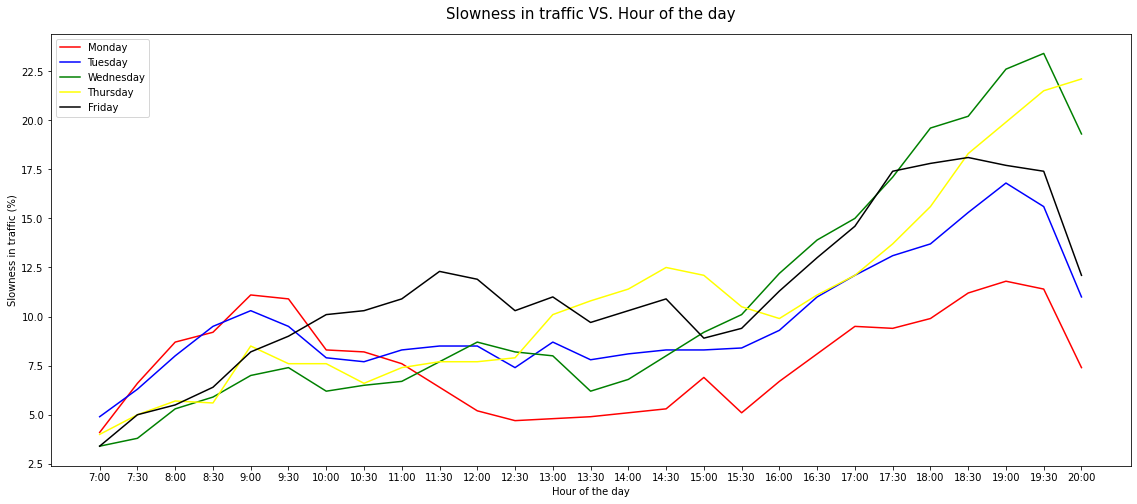

In [17]:
def slowness_over_time(df, coded_hours=False):
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_axes([0, 0, 1, 1])

    colors = {'Monday': 'r', 'Tuesday': 'b', 'Wednesday': 'g', 'Thursday': 'yellow', 'Friday':'black'}
    transform_days(df)
    for e in df['Day'].unique():
        subset = df[df['Day'] == e]
        ax.plot(subset['Hour (Coded)'], subset['Slowness in traffic (%)'], color=colors[e])

    ax.set_title('Slowness in traffic VS. Hour of the day', fontsize=15, pad=15)
    ax.set_xlabel('Hour of the day', fontsize=10)
    ax.set_ylabel('Slowness in traffic (%)', fontsize=10)
    
    if coded_hours is False:
        ax.set_xticks(range(1, 28))
        ax.set_xticklabels(map(code_hour, subset['Hour (Coded)'].unique()))

    ax.legend(colors, fontsize=10)

    plt.show()
slowness_over_time(data)
transform_days(data, to_numerical=True)

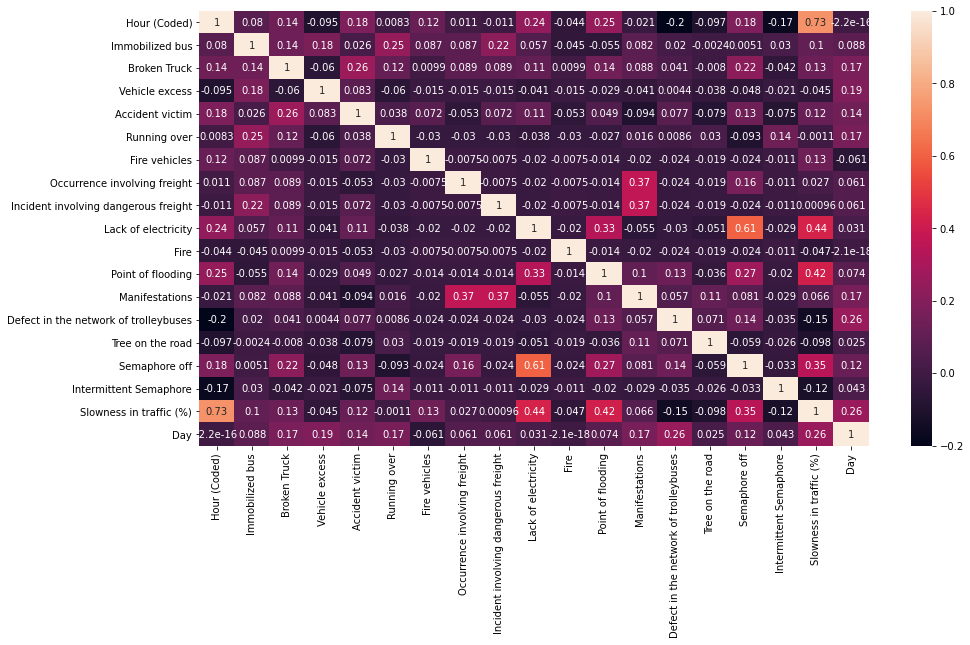

In [18]:
correlation_data = data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

In [19]:
correlation_values = correlation_data['Slowness in traffic (%)'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt Slowness in traffic (%)")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt Slowness in traffic (%)
Slowness in traffic (%)                  1.000000
Hour (Coded)                             0.729962
Lack of electricity                      0.436569
Point of flooding                        0.420016
Semaphore off                            0.347242
Day                                      0.261948
Defect in the network of trolleybuses    0.147035
Fire vehicles                            0.134103
Broken Truck                             0.131998
Accident victim                          0.121730
Intermittent Semaphore                   0.119942
Immobilized bus                          0.101143
Tree on the road                         0.098489
Manifestations                           0.066377
Fire                                     0.046737
Vehicle excess                           0.045297
Occurrence involving freight             0.026791
Running over                             0.001133
Incident involving dangerous freight     0.00095

In [20]:
#Remove features with less correlation
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.3:
        data = data.drop([correlation_values.index[col]], axis=1)

In [21]:
data

,Hour (Coded),Lack of electricity,Point of flooding,Semaphore off,Slowness in traffic (%)
0,1,0,0,0,4.1
1,2,0,0,0,6.6
2,3,0,0,0,8.7
3,4,0,0,0,9.2
4,5,0,0,0,11.1
...,...,...,...,...,...
130,23,0,0,0,17.8
131,24,0,0,0,18.1
132,25,0,0,0,17.7
133,26,0,0,1,17.4


Histogram

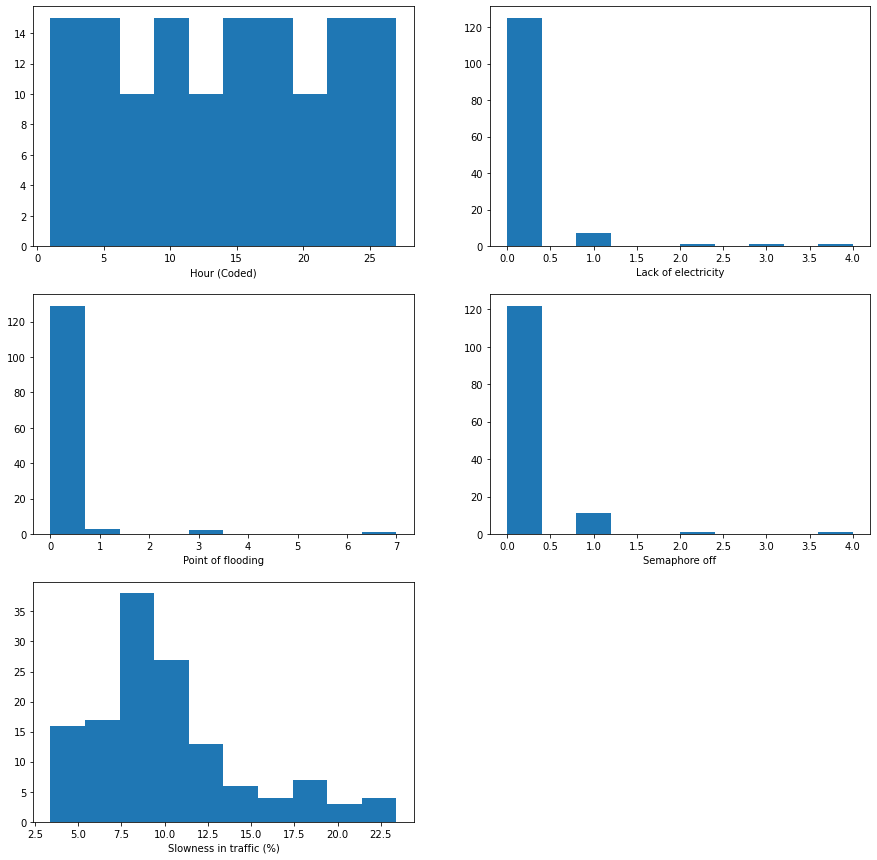

In [22]:
plt.figure(figsize=(15,15))
col = data.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//2+1,2,i+1)
    plt.hist(data[col[i]]);
    plt.xlabel(col[i])

Step 4: Apply Normalization and Generate Covariance Matrix

In [23]:
X = data.drop('Slowness in traffic (%)', axis=1)
X

,Hour (Coded),Lack of electricity,Point of flooding,Semaphore off
0,1,0,0,0
1,2,0,0,0
2,3,0,0,0
3,4,0,0,0
4,5,0,0,0
...,...,...,...,...
130,23,0,0,0
131,24,0,0,0
132,25,0,0,0
133,26,0,0,1


In [24]:
X = np.array(X)

In [25]:
#Normalisation
X = StandardScaler().fit_transform(X)

In [26]:
#Covariance Matrix
cov_mat = np.cov(X , rowvar = False)
traffic_columns = list(data.drop('Slowness in traffic (%)', axis=1).columns)
cov_table = PrettyTable([' '] + traffic_columns)
for i in range(len(traffic_columns)):
    cov_table.add_row([traffic_columns[i]] + list(cov_mat[i]))
print(cov_table)

+---------------------+---------------------+---------------------+---------------------+---------------------+
|                     |     Hour (Coded)    | Lack of electricity |  Point of flooding  |    Semaphore off    |
+---------------------+---------------------+---------------------+---------------------+---------------------+
|     Hour (Coded)    |  1.0074626865671643 | 0.24019103365748973 | 0.24686114755800456 | 0.18443121870299345 |
| Lack of electricity | 0.24019103365748973 |  1.007462686567165  |  0.336642235949281  |  0.6096778887877571 |
|  Point of flooding  | 0.24686114755800456 |  0.336642235949281  |  1.0074626865671645 |  0.2723615290085541 |
|    Semaphore off    | 0.18443121870299345 |  0.6096778887877571 |  0.2723615290085541 |  1.0074626865671652 |
+---------------------+---------------------+---------------------+---------------------+---------------------+


Step 5: Apply PCA

In [27]:
#Eigne values and vectors
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
eigen_values

array([0.39202048, 0.7381648 , 0.91082765, 1.98883781])

In [28]:
eigen_vectors

array([[ 0.05101099,  0.50767419, -0.77941633, -0.36355876],
       [-0.73239246,  0.12762494,  0.31130859, -0.59194604],
       [ 0.08186922, -0.82803649, -0.32398592, -0.45020675],
       [ 0.67401528,  0.20083415,  0.43661226, -0.56101585]])

In [29]:
#Sorted Eigen values and vectors
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [30]:
sorted_eigenvalue

array([1.98883781, 0.91082765, 0.7381648 , 0.39202048])

In [31]:
sorted_eigenvectors

array([[-0.36355876, -0.77941633,  0.50767419,  0.05101099],
       [-0.59194604,  0.31130859,  0.12762494, -0.73239246],
       [-0.45020675, -0.32398592, -0.82803649,  0.08186922],
       [-0.56101585,  0.43661226,  0.20083415,  0.67401528]])

In [32]:
#Select a subset from the rearranged matrix
num_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:num_components]
X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()

In [33]:
eigenvector_subset

array([[-0.36355876, -0.77941633],
       [-0.59194604,  0.31130859],
       [-0.45020675, -0.32398592],
       [-0.56101585,  0.43661226]])

In [34]:
principal_data =  pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
principal_data = pd.concat([principal_data, data['Slowness in traffic (%)']], axis=1)
principal_data

,PC1,PC2,Slowness in traffic (%)
0,0.974301,1.162621,4.1
1,0.927624,1.062553,6.6
2,0.880948,0.962486,8.7
3,0.834271,0.862418,9.2
4,0.787594,0.762350,11.1
...,...,...,...
130,-0.052585,-1.038871,17.8
131,-0.099262,-1.138939,18.1
132,-0.145938,-1.239006,17.7
133,-1.406002,-0.394752,17.4


Step 6. Build the model, summarize it and evaluate the model and Summarize

In [37]:
X = principal_data.drop(columns='Slowness in traffic (%)')
Y = principal_data[['Slowness in traffic (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=65)

# Create linear regression object
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [38]:
#Summarize 
linear_regression_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [39]:
#Prediction
y_pred = linear_regression_model.predict(X_test)
for idx, col_name in enumerate(principal_data.drop(columns='Slowness in traffic (%)').columns):
    print(f"Coefficient for {col_name}: {linear_regression_model.coef_[0][idx]}")

Coefficient for PC1: -1.8953921254916561
Coefficient for PC2: -2.0257398973082883


PC@2 is more important than PC1 for predictions

In [41]:
#Evaluating the model
linear_regression_score = linear_regression_model.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(linear_regression_score, 4))
print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test, y_pred), 4))
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mean_squared_error(y_test, y_pred)),4))

Score of Linear Regression Model:  0.7978
Mean Squared Error (MSE):  5.2461
Root Mean Squared Error (RMSE):  2.2904


ConclusioN:
1. Faster training period of algorithm due to reduced dimensions
2. Dataset is transformed into 2 PCs.
3. Linear regression score obtained is 0.7978